# Problem definition

In [1]:
using GeoStats
using DataFrames
using Plots
pyplot(size=(1000,500))

df = csv"""
   x,    y, variable
25.0, 25.0,      1.0
50.0, 75.0,      0.0
75.0, 50.0,      1.0
"""

geodata = GeoDataFrame(df, [:x,:y])

domain = RegularGrid{Float64}(100,100)

problem = EstimationProblem(geodata, domain, :variable)

2D EstimationProblem
  data:      3×3 GeoDataFrame (x and y)
  domain:    100×100 RegularGrid{Float64,2}
  variables: variable (Float64)

# Solver options

The user can specify the number of neighbors (default to all data locations) and a metric from the [Distances.jl](https://github.com/JuliaStats/Distances.jl) package (default to Euclidean). If the number of neighbors is set to 1, the algorithm reduces to a simple tesselation algorithm.


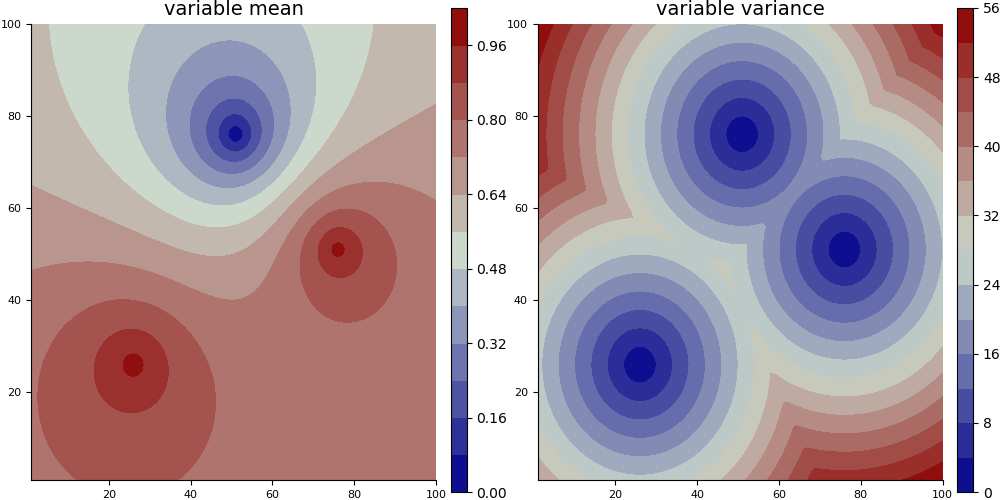

In [2]:
using InverseDistanceWeighting

# default options
solution = solve(problem, InvDistWeight())

plot(solution)


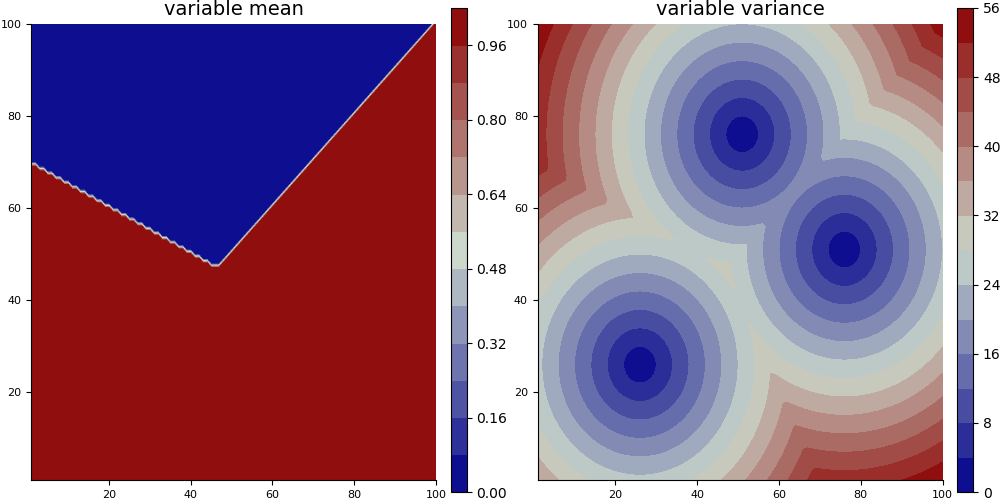

In [3]:
# 1 nearest neighbor => simple tesselation
solver = InvDistWeight(
    :variable => @NT(neighbors=1)
)

solution = solve(problem, solver)

plot(solution)


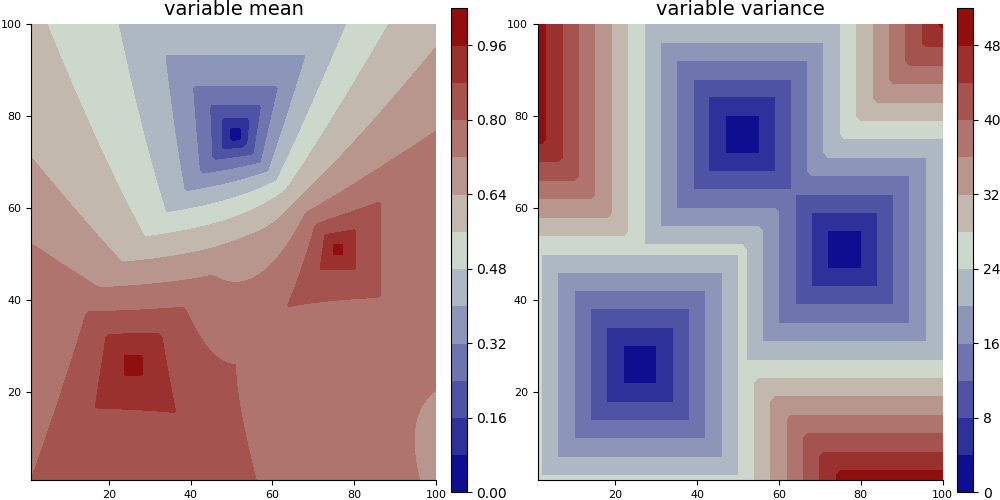

In [4]:
# custom metric
solver = InvDistWeight(
    :variable => @NT(metric=Chebyshev())
)

solution = solve(problem, solver)

plot(solution)